In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_parquet('~/ljstorage/data_science_env/yellowcab22.parquet', engine='pyarrow')

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [9]:
df.shape

(2463931, 19)

In [11]:
df.isna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
2463927,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
2463928,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
2463929,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True


In [12]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [26]:
df = df.dropna()
# dropping nan

In [18]:
#new column for trip duration (minutes)
df.loc[:, 'trip_duration_mins'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.total_seconds() / 60

In [27]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

#new columns are for hour and day of week

Hour 18 (6PM) has the most trips

    hour_of_day  trip_count
18           18      172507
17           17      172256
15           15      170569
16           16      164751
14           14      160138


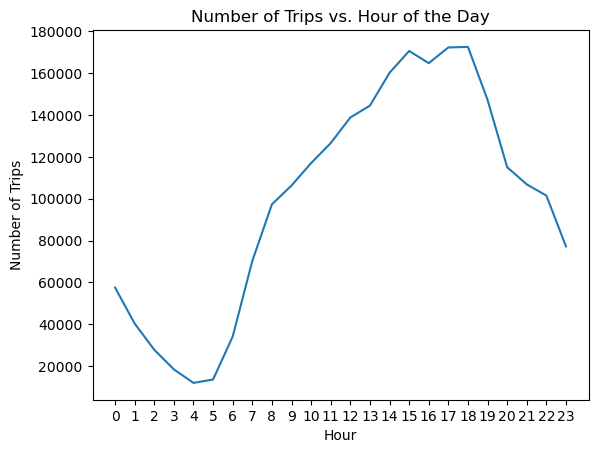

In [43]:
#create a line plot w/ # of trips as function of hour of the day
hourly_trip_sum = df.groupby('hour_of_day').size().reset_index(name='trip_count')
sns.lineplot(data=hourly_trip_sum, x = 'hour_of_day', y = 'trip_count')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Hour of the Day')
plt.xticks(range(0,24));
# Find the top 5 hours with the highest number of trips - hour 18 (6PM) has the most trips
top_hours = hourly_trip_sum.sort_values(by='trip_count', ascending=False).head(5)
print('''Hour 18 (6PM) has the most trips
''')
print(top_hours)

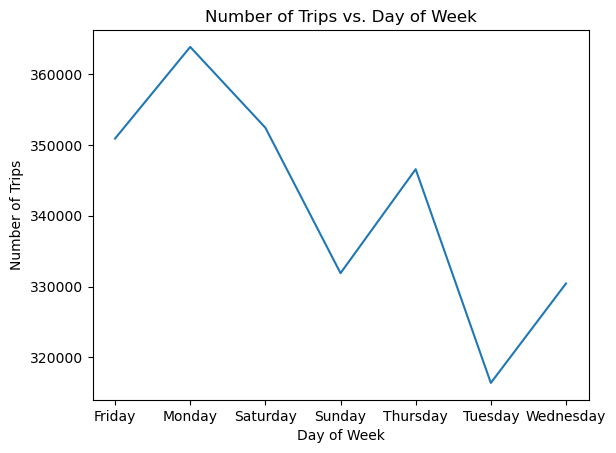

In [46]:
#lineplot displaying # of trips by day
hourly_trip_sum = df.groupby('day_of_week').size().reset_index(name='trip_count')
sns.lineplot(data=hourly_trip_sum, x = 'day_of_week', y = 'trip_count')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips vs. Day of Week');

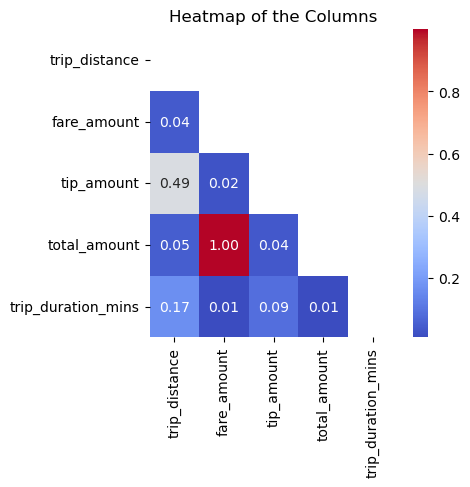

In [52]:
interesting_columns = ['trip_distance','fare_amount','tip_amount','total_amount','trip_duration_mins']
correlation_matrix = df[interesting_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the Columns')
plt.show()

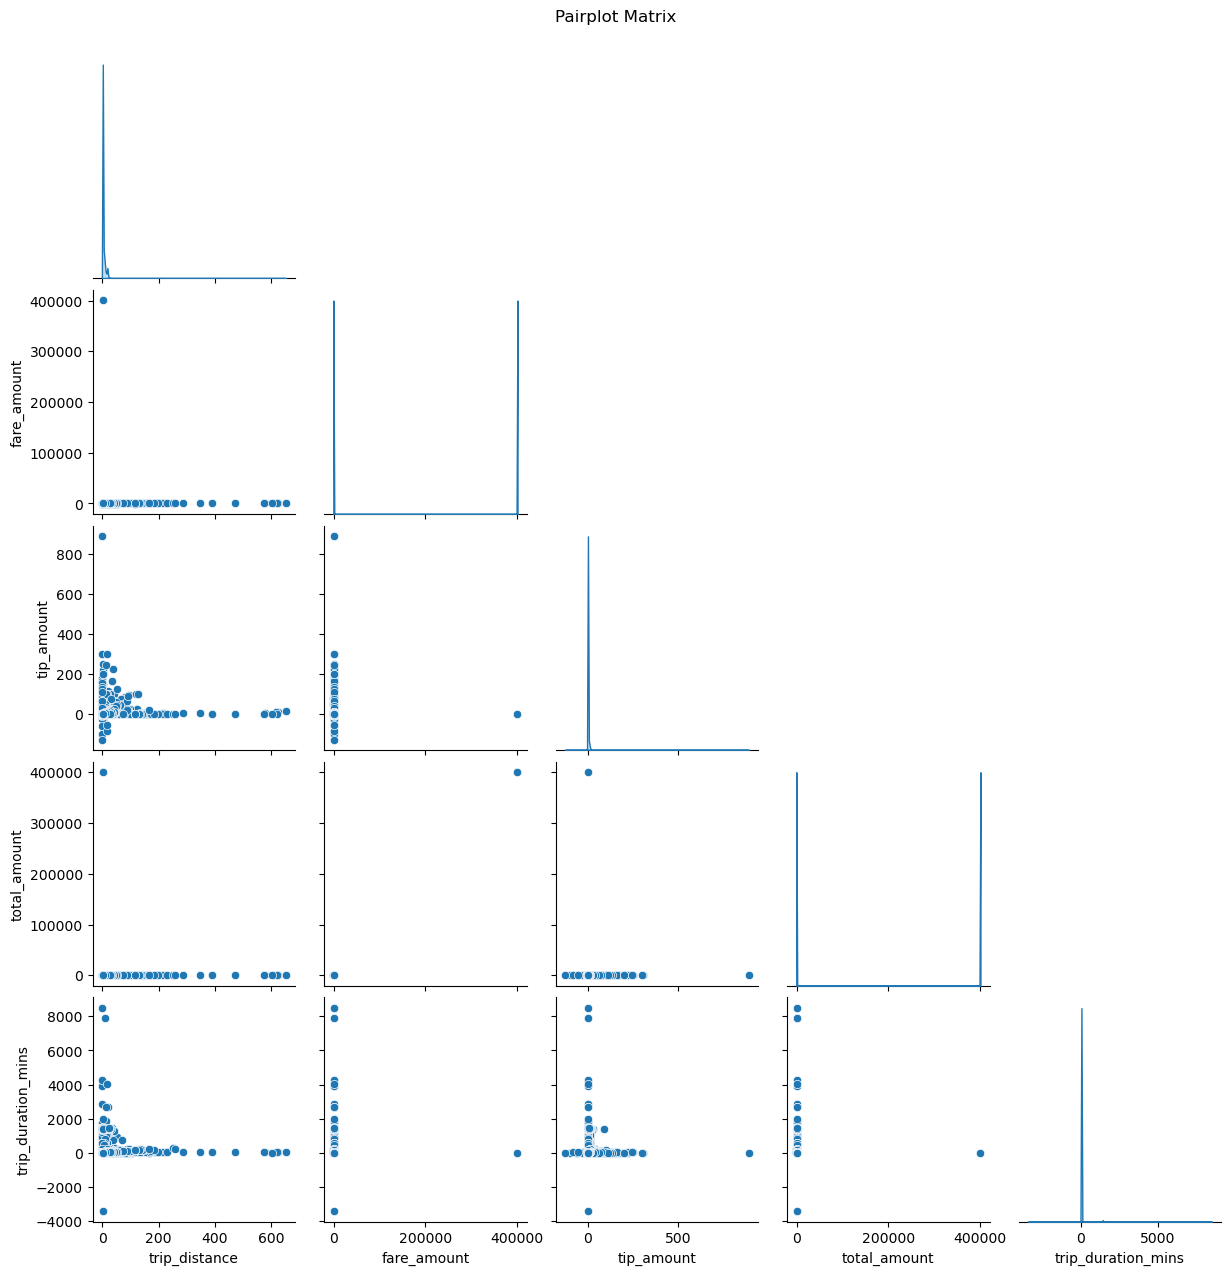

In [59]:
sns.pairplot(df[interesting_columns],diag_kind='kde',corner=True)
plt.suptitle('Pairplot Matrix',y=1.02)
plt.show()

In [60]:
# there's a few major variances in a few of these
# fare amount has a big outlier
# tip amount has a big outlier
# total amount has a big outlier

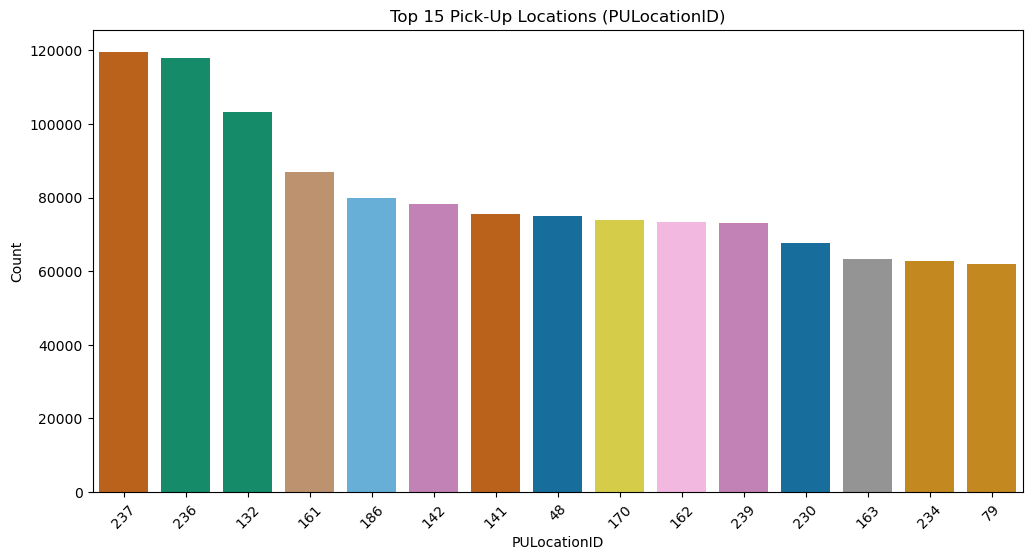

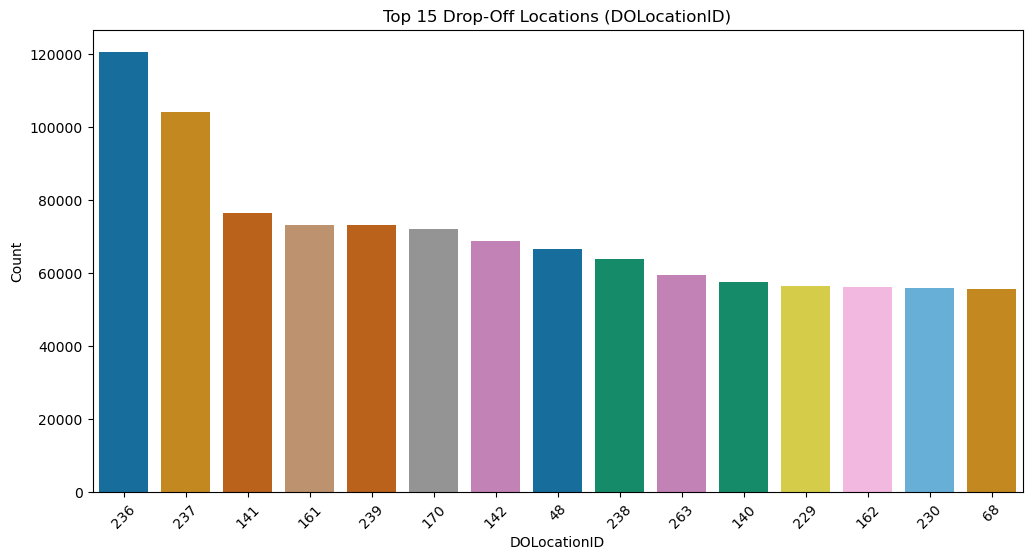

The most popular pick-up location is PULocationID: 237


In [68]:
top_pu = df['PULocationID'].value_counts().head(15).index

# Filter the DataFrame to only include the top 15 PULocationID
filtered_pu_df = df[df['PULocationID'].isin(top_pu)]

# Plot the countplot for PULocationID
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_pu_df, x='PULocationID', order=top_pu, palette="colorblind", hue='PULocationID', legend=False)
plt.title("Top 15 Pick-Up Locations (PULocationID)")
plt.xlabel("PULocationID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Get the top 15 DOLocationID by value counts
top_do = df['DOLocationID'].value_counts().head(15).index

# Filter the DataFrame to only include the top 15 DOLocationID
filtered_do_df = df[df['DOLocationID'].isin(top_do)]

# Plot the countplot for DOLocationID
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_do_df, x='DOLocationID', order=top_do, palette="colorblind", hue='DOLocationID', legend=False)
plt.title("Top 15 Drop-Off Locations (DOLocationID)")
plt.xlabel("DOLocationID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Identify the most popular pick-up location
most_popular_pu = df['PULocationID'].value_counts().idxmax()
print(f"The most popular pick-up location is PULocationID: {most_popular_pu}")

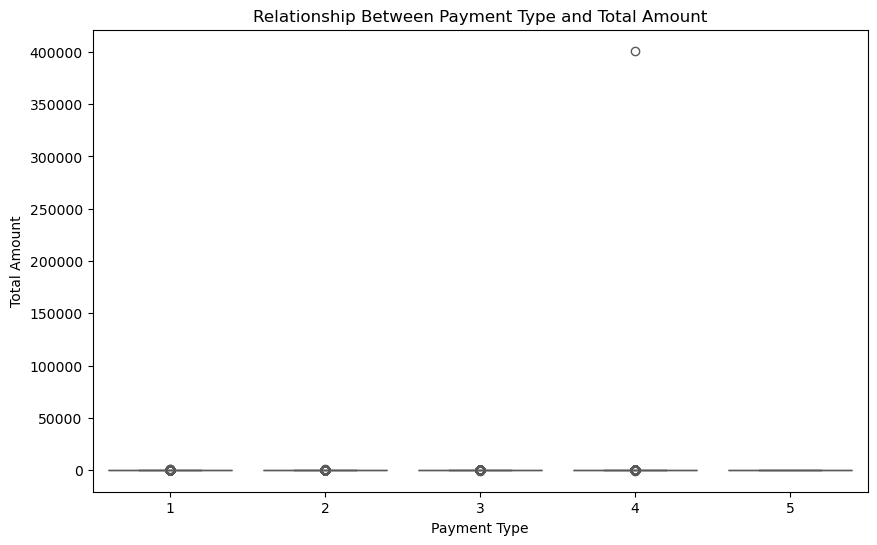

In [70]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(data=df, x='payment_type', y='total_amount', palette='Set2', hue='payment_type', legend=False)

# Add titles and labels
plt.title("Relationship Between Payment Type and Total Amount")
plt.xlabel("Payment Type")
plt.ylabel("Total Amount")

# Show the plot
plt.show()

In [71]:
# pretty obvious that the outlier for total amount is messing up this boxplot. Or I'm bad at writing code. Probably both.

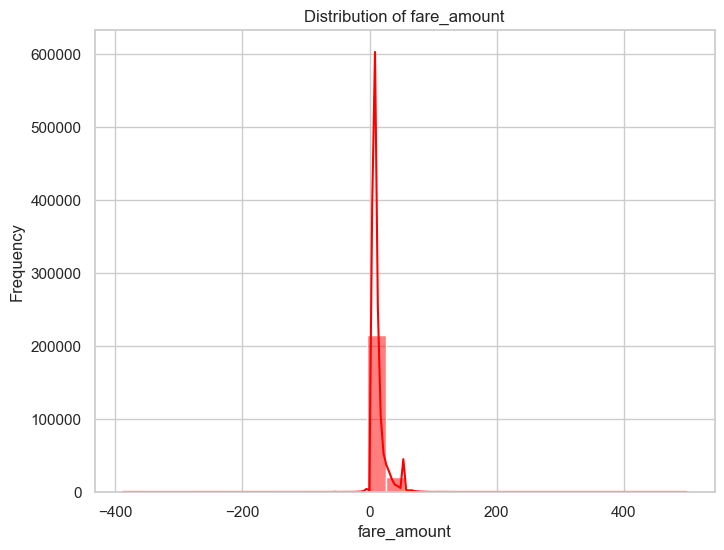

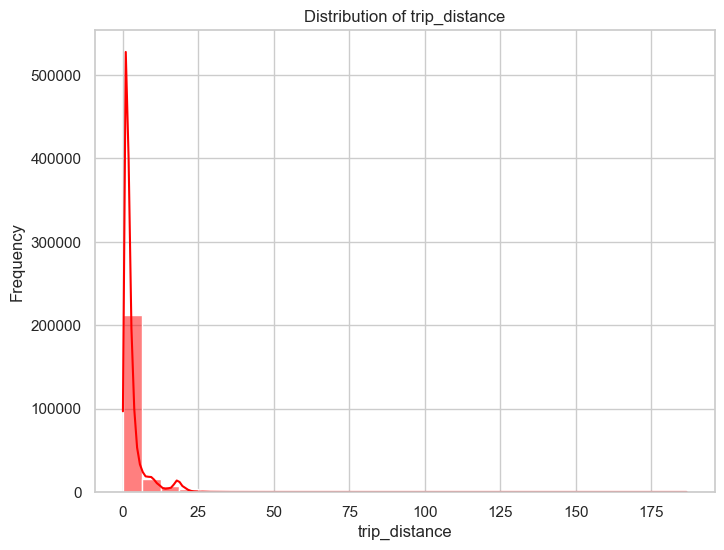

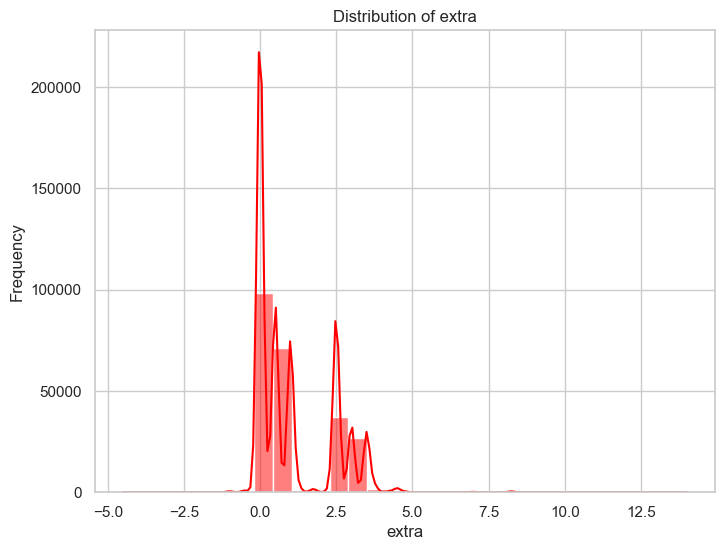

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = df.sample(frac=0.1, random_state=42)

sns.set(style="whitegrid")

variables = ['fare_amount', 'trip_distance', 'extra']

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(sampled_df[var], kde=True, bins=30, color="red")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()